In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import dataCollect.dataToVar as dat
from parseTxt import simpleHold

In [2]:
a = simpleHold('TCModelTune50_2.txt')
b = simpleHold('TCModelTune70_1.txt')
c = simpleHold('TCModelTune90_2.txt')
d = simpleHold('TCModelTune100_1.txt')


shortest = min(len(a[0][0]),len(a[1][0]),len(b[1][0]),len(b[0][0]),len(c[1][0]),len(c[0][0]),len(d[1][0]),len(d[0][0]))


totalDat = [a,b,c,d]
test = 18
samp = []
sampRaw = []
time = []
Ttherm = []
for i in totalDat:
    samp.append(-i[0][0][test:shortest]+max(i[0][0]))
    sampRaw.append(i[0][0][test:shortest])
    time.append(i[1][1][test:shortest])
    Ttherm.append(np.array(i[1][0][test:shortest]))


for i in Ttherm:
    for j in range(len(i)):
        if str(i[j]) == 'nan':
            i[j] = i[j-1]


# for i in range(4):
#     print(sampRaw[i][0])

3.646000000000001 6.3289999999999935 6.830999999999989 5.2819999999999965
-0.0027262500000000025 0.4613000000000005 -12.603375000000014


''

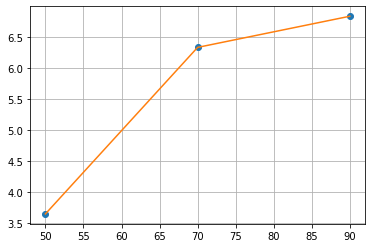

In [3]:
offFif = 50 - np.average(a[0][0][-10:])
offSev = 70 - np.average(b[0][0][-10:])
offNin = 90 - np.average(c[0][0][-10:])
offOne = 100 - np.average(d[0][0][-10:])         #offFif,
print(offFif,offSev,offNin,offOne)
xx = np.array([50,70,90])#,100])
yy = np.array([offFif,offSev,offNin])#,offOne])

aa,bb,cc = np.polyfit(xx,yy,2)                              #offset coeffs
plt.plot(xx,yy,'o')
plt.plot(xx,aa*xx**2+bb*xx+cc)
plt.grid()
print(aa,bb,cc)


;

In [4]:
def r2(y,fit):
    st = sum((y-np.average(y))**2)
    sr = sum((y-fit)**2)
    r2 = 1-sr/st
    return r2

# def decay(lam):
#     return (max(totalDat[i][2])-min(totalDat[i][2]))*np.exp(-lam*time[i])

# def T(lam,Tset,time):
#     offset = aa*Tset**2+bb*Tset+cc
#     return (-Tset+offset+30)*np.exp(-lam*time)+Tset-offset
def T(lam,Tset,time,sampa):
    offset = aa*Tset**2+bb*Tset+cc
    # print(sampa[0])
    # print(Tset[-1])
    return (-Tset[-1]+offset+sampa[0])*np.exp(-lam*time)+Tset[-1]-offset

        



zlist = []
for i in sampRaw:
    for j in i:
        zlist.append(j)
zlist = np.array(zlist)
###############################################################################################################################################################################################




In [5]:
tries = np.arange(0,1,.0001)

rr = {}
for i in tries:
    zlistFit = []
    for j in range(len(sampRaw)):
        zlistFit.append(T(i,Ttherm[j],time[j],sampRaw[j]))
  
    zlistFitShape = []
    for k in zlistFit:
        for l in k:
            zlistFitShape.append(l)
    zlistFitShape = np.array(zlistFitShape)
    

    r = r2(zlist,zlistFitShape)
    
    if r >= 0 and r <= 1:
        rr[r] = i
print(zlist)
print(max(rr.keys()))
print(rr[max(rr.keys())])
rr[max(rr.keys())] = .01
    
    

10000
[28.57 28.95 29.44 ... 94.48 94.48 94.47]
0.9807257141405291
0.1056


''

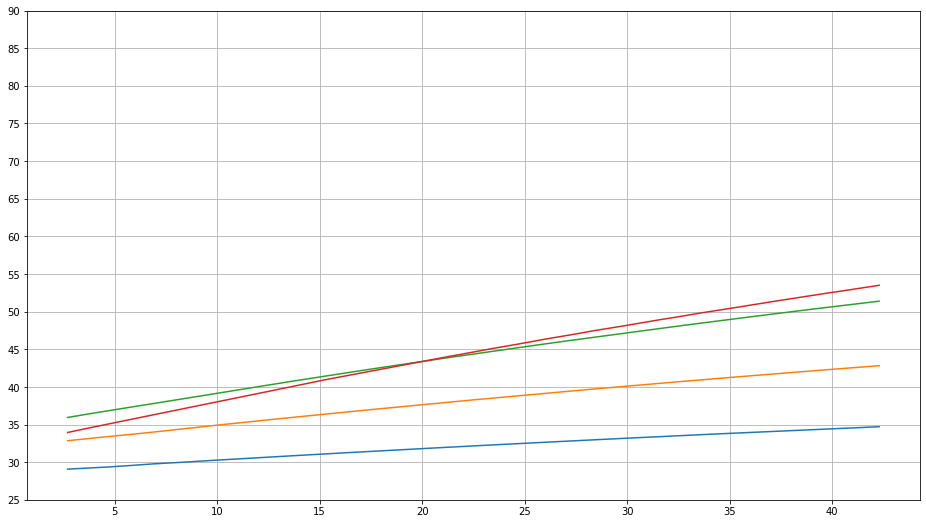

In [6]:
plt.figure(figsize=(16,9))
# for i in range(len(sampRaw)):
#     plt.plot(time[i],sampRaw[i])
for i in range(len(totalDat)):
    plt.plot(time[i],T(rr[max(rr.keys())],Ttherm[i],time[i],sampRaw[i]))
    
    # plt.plot(time[i],T(.025,Ttherm[i],time[i]))
plt.grid()
plt.yticks(np.arange(25,95,5))
# plt.xticks(np.arange(0,500,50))


;

In [7]:
x = [50,70,90,100]
y = [.1003,.1052,.1122,.0982]
aa,bb,cc = np.polyfit(x,y,2)

def lammmmmmbda(Tset):
    return aa*Tset**2+bb*Tset+cc

''

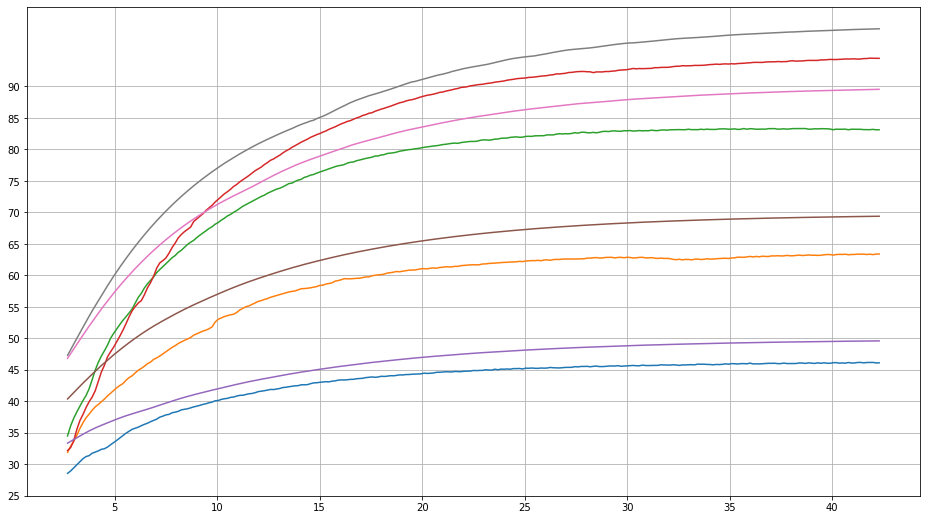

In [8]:


plt.figure(figsize=(16,9))
for i in range(len(sampRaw)):
    plt.plot(time[i],sampRaw[i])
for i in range(len(totalDat)):
    plt.plot(time[i],T(lammmmmmbda(Ttherm[i]),Ttherm[i],time[i],sampRaw[i]))
    # plt.plot(time[i],T(.025,Ttherm[i],time[i]))
plt.grid()
plt.yticks(np.arange(25,95,5))
# plt.xticks(np.arange(0,500,50))
;